# Boston Housing Price Prediction - Linear Regression


### Author: Kriti Srivastava
### Date: 01/20/2021

#### Background: 
Real estate listing prices are always unstable therefore there is the need of the system at can predict the pricing of a listing depending upon various factors such as 'per capita crime rate by town', 'proportion of residential land zoned for lots over 25,000 sq.ft.', etc.Listing price prediction can be helpful for all the stakeholders (investers, listing agents,sellers and customers). This study is to develop a system that can predict the listing price depending on various factors by implemnting linear regression on the sample data of Boston housing avaibale in sciki learn. 

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ . 
The dataset has 506 rows and 14 columns.
According to the desription from dataset: "This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter."

#### Problem Statement:
From this dataset I am trying to predict how listing pricing are affected by following factors: 
* per capita crime rate by town
* proportion of residential land zoned for lots over 25,000 sq.ft.
* proportion of non-retail business acres per town
* Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* nitric oxides concentration (parts per 10 million)
* average number of rooms per dwelling
* proportion of owner-occupied units built prior to 1940
* weighted distances to five Boston employment centres
* index of accessibility to radial highways
* full-value property-tax rate per 10,000 USD
* pupil-teacher ratio by town
* 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* % lower status of the population


#### Steps followed for Analysis Processes:
1. Loading Data
2. Dataset Description
3. Pre Processing and Exploratory Data Analysis
     * Dummuy variables
     * Data cleansing
     * 5 summary description
     * Visualizing current data. 
4. Handling outliers
     * Investigating them
     * Removing them
5. Check for Multicollinearity
6. Multivatiate regression
7. Implementing mutivatiate regression
8. Validation
    * Using Training and Validation
9. Predicting Price
10. Residual Plots

#### Number of dependent variables and description:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10,000 USD
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population

#### Number of independent variables and description:
Median value of owner-occupied homes in $1000's

#### 1. Data Loading:

Import our data analysis liberaries.

In [5]:
# import liberaries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame



Imports for plotting.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# setting the style of datagrid to white
sns.set_style('whitegrid')

Import data set from scikit learn as well as the linear_model module. 

In [7]:
from sklearn.datasets import load_boston

Download housing dataset.

In [8]:
boston_house = load_boston()   # load boston data and assign it to boston_house
boston_house.data             # show data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Housing data is in the array structure, need to know dataset details.

#### 2. Dataset Description:

In [9]:
print(boston_house.DESCR)  # DESCR gives the discription about the dataset load_boston that is builtin dataset in sklearn

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 3. Exploratory Data Aanlysis:

In [10]:
# converting the array structure of data into pandas data frame
boston_df = DataFrame(boston_house.data)  

# labelling the datadrame columns
boston_df.columns = boston_house.feature_names

# top 5 rows
boston_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# rows and columns of data set
boston_df.shape

(506, 13)

Dataset has 506 sample objects and 13 independent factors.

Now adding label or dependent factor into the dataset.

In [12]:
# adding the dependent / target column from load_boston() into our dataframe
boston_df['Price']=boston_house.target

# show top 5 rows of the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Dummy Variable:**

Now the datafram has 14 columns that include 13 independent variables/factors and 1 dependent variable/factors where 12 dependent variables are numerical and one is categorical for which they source already created the dummy variable ( CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)).
Therefore, there is no need for creating dummy variable.

#### Data Cleansing:
Now looking for missing values.

In [13]:
# is any missing values across columns

boston_df.isnull().any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

No missing value found.

#### 5 -  Data Summary Description

In [14]:
# summary of the data distribution
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


50 percentile of the boston listings had  per capita crime rate by town as 25%. For me, this rate looks concerning to me and makes me think about safe neightbourhoods in Boston. However, this data set do not have information to really compare crim rate by neighbour hood.  
ZN: 50th percentile of the distribution of the housings in Bostan has zero proportion of residential land zoned for lots over 25,000 sq.ft.
AGE: 50 percentile og the distings in the Bostom are approx 77 years old.

#### Visualizing current data

#### Histogram : To show the distribution of the proportion of residential land zoned for lots over 25,000 sq.ft


Text(0,0.5,'Number of Houses')

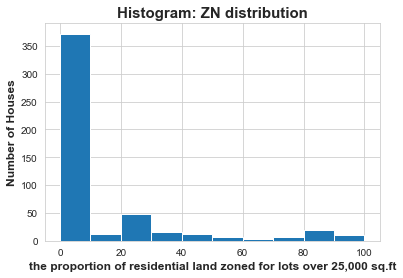

In [15]:
# plotting histogram
plt.hist(boston_df['ZN'], bins=10)

# setting the title
plt.title('Histogram: ZN distribution', size= 15, fontweight='bold')

# setting the x-axis lable
plt.xlabel('the proportion of residential land zoned for lots over 25,000 sq.ft', size= 12, fontweight='bold')

# setting y-axis Lable
plt.ylabel('Number of Houses', size=12, fontweight='bold')

We can see the distribution is extremly right skwed. More than 350 housings in the sample had zeroproportion of residential land zoned for lots over 25,000 sq.ft.

**Histogram : To show the distribution of the Price**

Text(0,0.5,'Number of Houses')

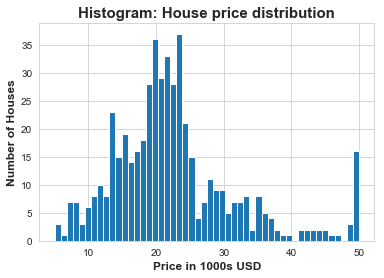

In [16]:
# plotting histogram
plt.hist(boston_df['Price'], bins=50)

# setting the title
plt.title('Histogram: House price distribution', size= 15, fontweight='bold')

# setting the x-axis lable
plt.xlabel('Price in 1000s USD', size= 12, fontweight='bold')

# setting y-axis Lable
plt.ylabel('Number of Houses', size=12, fontweight='bold')

We can see the distribution is some what normal with little sextemlykwedness towards right.However, we can see the spike in the distribution near the bin of 50. It means we have spike in the number of houses with the price of $50,000. It apears to have outliers.

#### Box plot: To shows the price distribution depending upon Charles River  ( tract bounds river or not)

Text(0.5,0,'Tract bounds river or not')

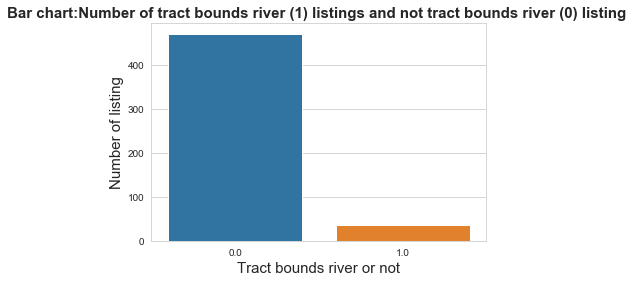

In [17]:
# bar chart
sns.countplot(x='CHAS',data=boston_df, )
# setting the title
plt.title('Bar chart:Number of tract bounds river (1) listings and not tract bounds river (0) listing ', size= 15, fontweight='bold')
# setting the y-axis lable
plt.ylabel("Number of listing", size=15)
# setting the x-axis lable
plt.xlabel("Tract bounds river or not", size=15)

We can see there is huge number of listings that are not tract bound listings as compare to tract bound listings. Since, there always been more depands on tract bounds listing therefore, they have more expensive which confirms with Boxplot.


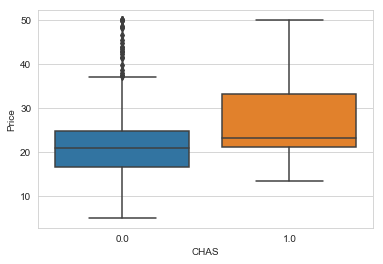

In [18]:

sns.boxplot(data=boston_df, x='CHAS', y='Price')

The median price of listings near river are more than the median price of the listings that are not in near river. We can also see that most of the listings are at the higher range of the pricings. 

#### The correlation between the housing price and the number of rooms in the dwelling

Text(0,0.5,'Price in $1000s')

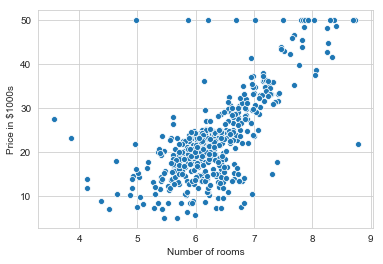

In [19]:
# Scatter Plot
sns.scatterplot(data = boston_df, x ='RM', y= 'Price')
#label
plt.xlabel('Number of rooms')
plt.ylabel('Price in $1000s')



We can see the trend that price increases along with the number of rooms in that house, which makes sense. Now lets see linear fit.

Text(3.675,0.5,'Price in $1000s')

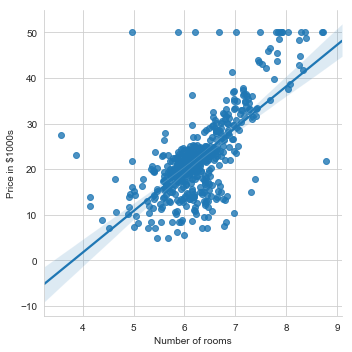

In [20]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)
#label
plt.xlabel('Number of rooms')
plt.ylabel('Price in $1000s')

#### Checking the distribution of all the predictors

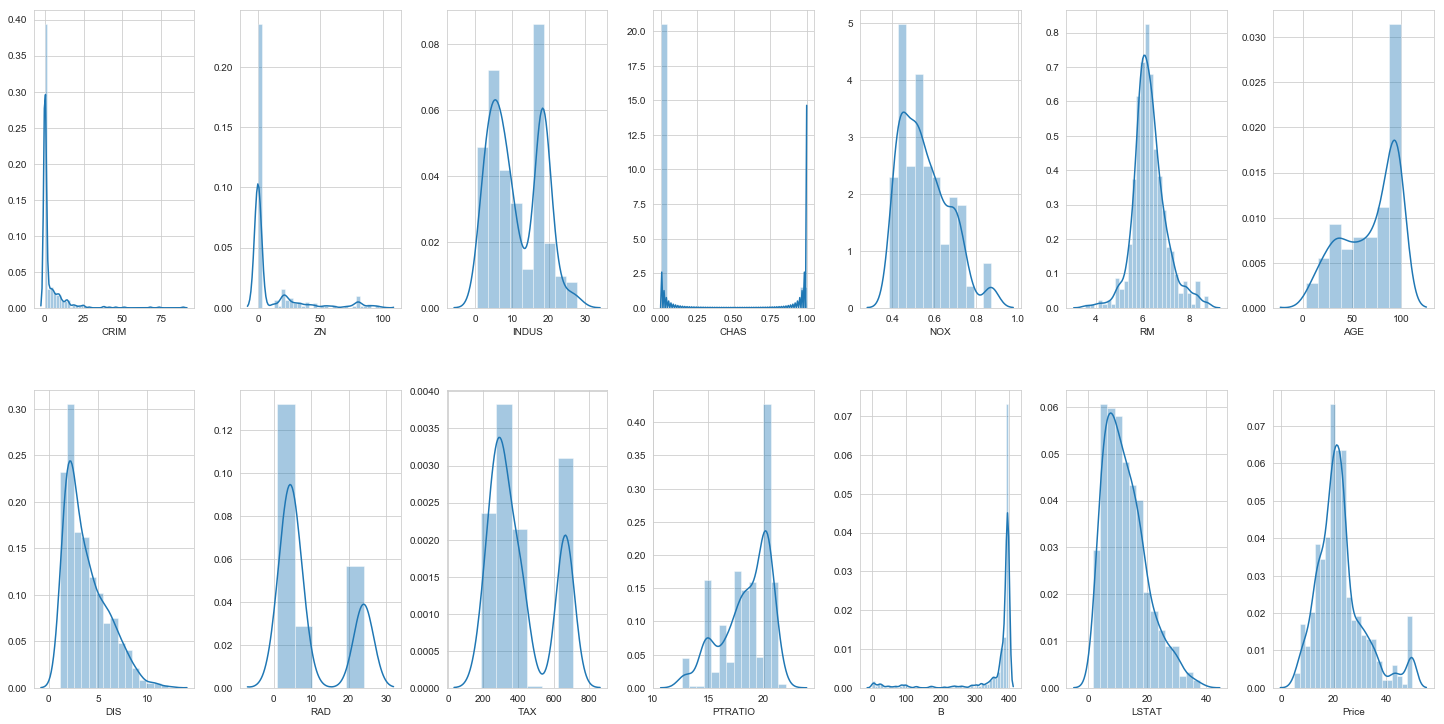

In [21]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)


* Since CHAS is a dummy variable for catagorical variable, therefore, ignoring its distribution.
* CRIM, ZN, B are extremly skewed distributed.
* As mentioned above Pricing appears to be normaly distributed with some outliers.


### Handling Outliers

#### Investigating Outliers in Pricing   


In [24]:
q1 = boston_df['Price'].quantile(0.25)   # Calculating Q1 of Price
q3 = boston_df['Price'].quantile(0.75)   # calculating Q3 of Price
iqr = q3 - q1                           # calculating inter quantile range
low_fence = q1 - 1.5 * iqr           # calculating the lower boundary
upper_fence = q3 + 1.5 * iqr         # calculating the upper boundary
boston_df[(boston_df['Price'] < low_fence) | (boston_df['Price'] > upper_fence)]      
# outliers by pricing Number_of_outliers = len(boston_df[(boston_df['Price'] < low_fence) | (boston_df['Price'] > upper_fence)]) # calculating number of outliers
#print("Number of outliers = {}").format(Number_of_outliers)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9


We have 40 outliers. Now removing the Outliers

In [25]:
boston_df = boston_df[(boston_df['Price'] > low_fence) & (boston_df['Price'] < upper_fence)] # removing outlier
print(np.shape(boston_df))

(466, 14)


Checking the distribution of price again


Text(0,0.5,'Number of Houses')

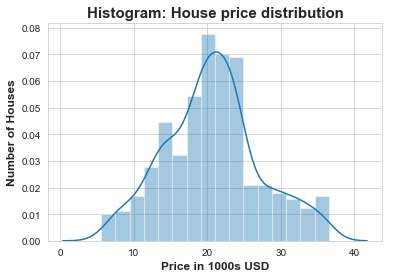

In [26]:
# plotting histogram
sns.distplot(boston_df['Price'])
# setting the title
plt.title('Histogram: House price distribution', size= 15, fontweight='bold')

# setting the x-axis lable
plt.xlabel('Price in 1000s USD', size= 12, fontweight='bold')

# setting y-axis Lable
plt.ylabel('Number of Houses', size=12, fontweight='bold')


#### Assumptions of Linear Regression
*	Linear Relationship
*	Multivariate Normality
*	No or Little Multicollinearity
*	No or Little Autocorrelation
*	Homoscedasticity


#### Multicollinearity:
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

#### Multicolliniarity Check:
Multicollinearity can be checked in two way:
1. **Calculating the linear correlation strength between all the exploratory variables or features:**
If there are any two features with high linear relation with strength between (-1 to -0.7) or (0.7 to 1) then those two features are correlated to each other have the issue of multicollinearity. To remove multicollinearity, any one
feature from the high linearly correlated feature pair has to be removed.
2. **Using Variance inflation factor VIF:**
VIF measures the severity of multicollinearity in regression analysis. Any exploratory variable has the VIF greater 10 which means that the variable is multicollinear with any other exploratory variable in the regression model.


#### Creating Scatter plots between price and rest of dependent variables.

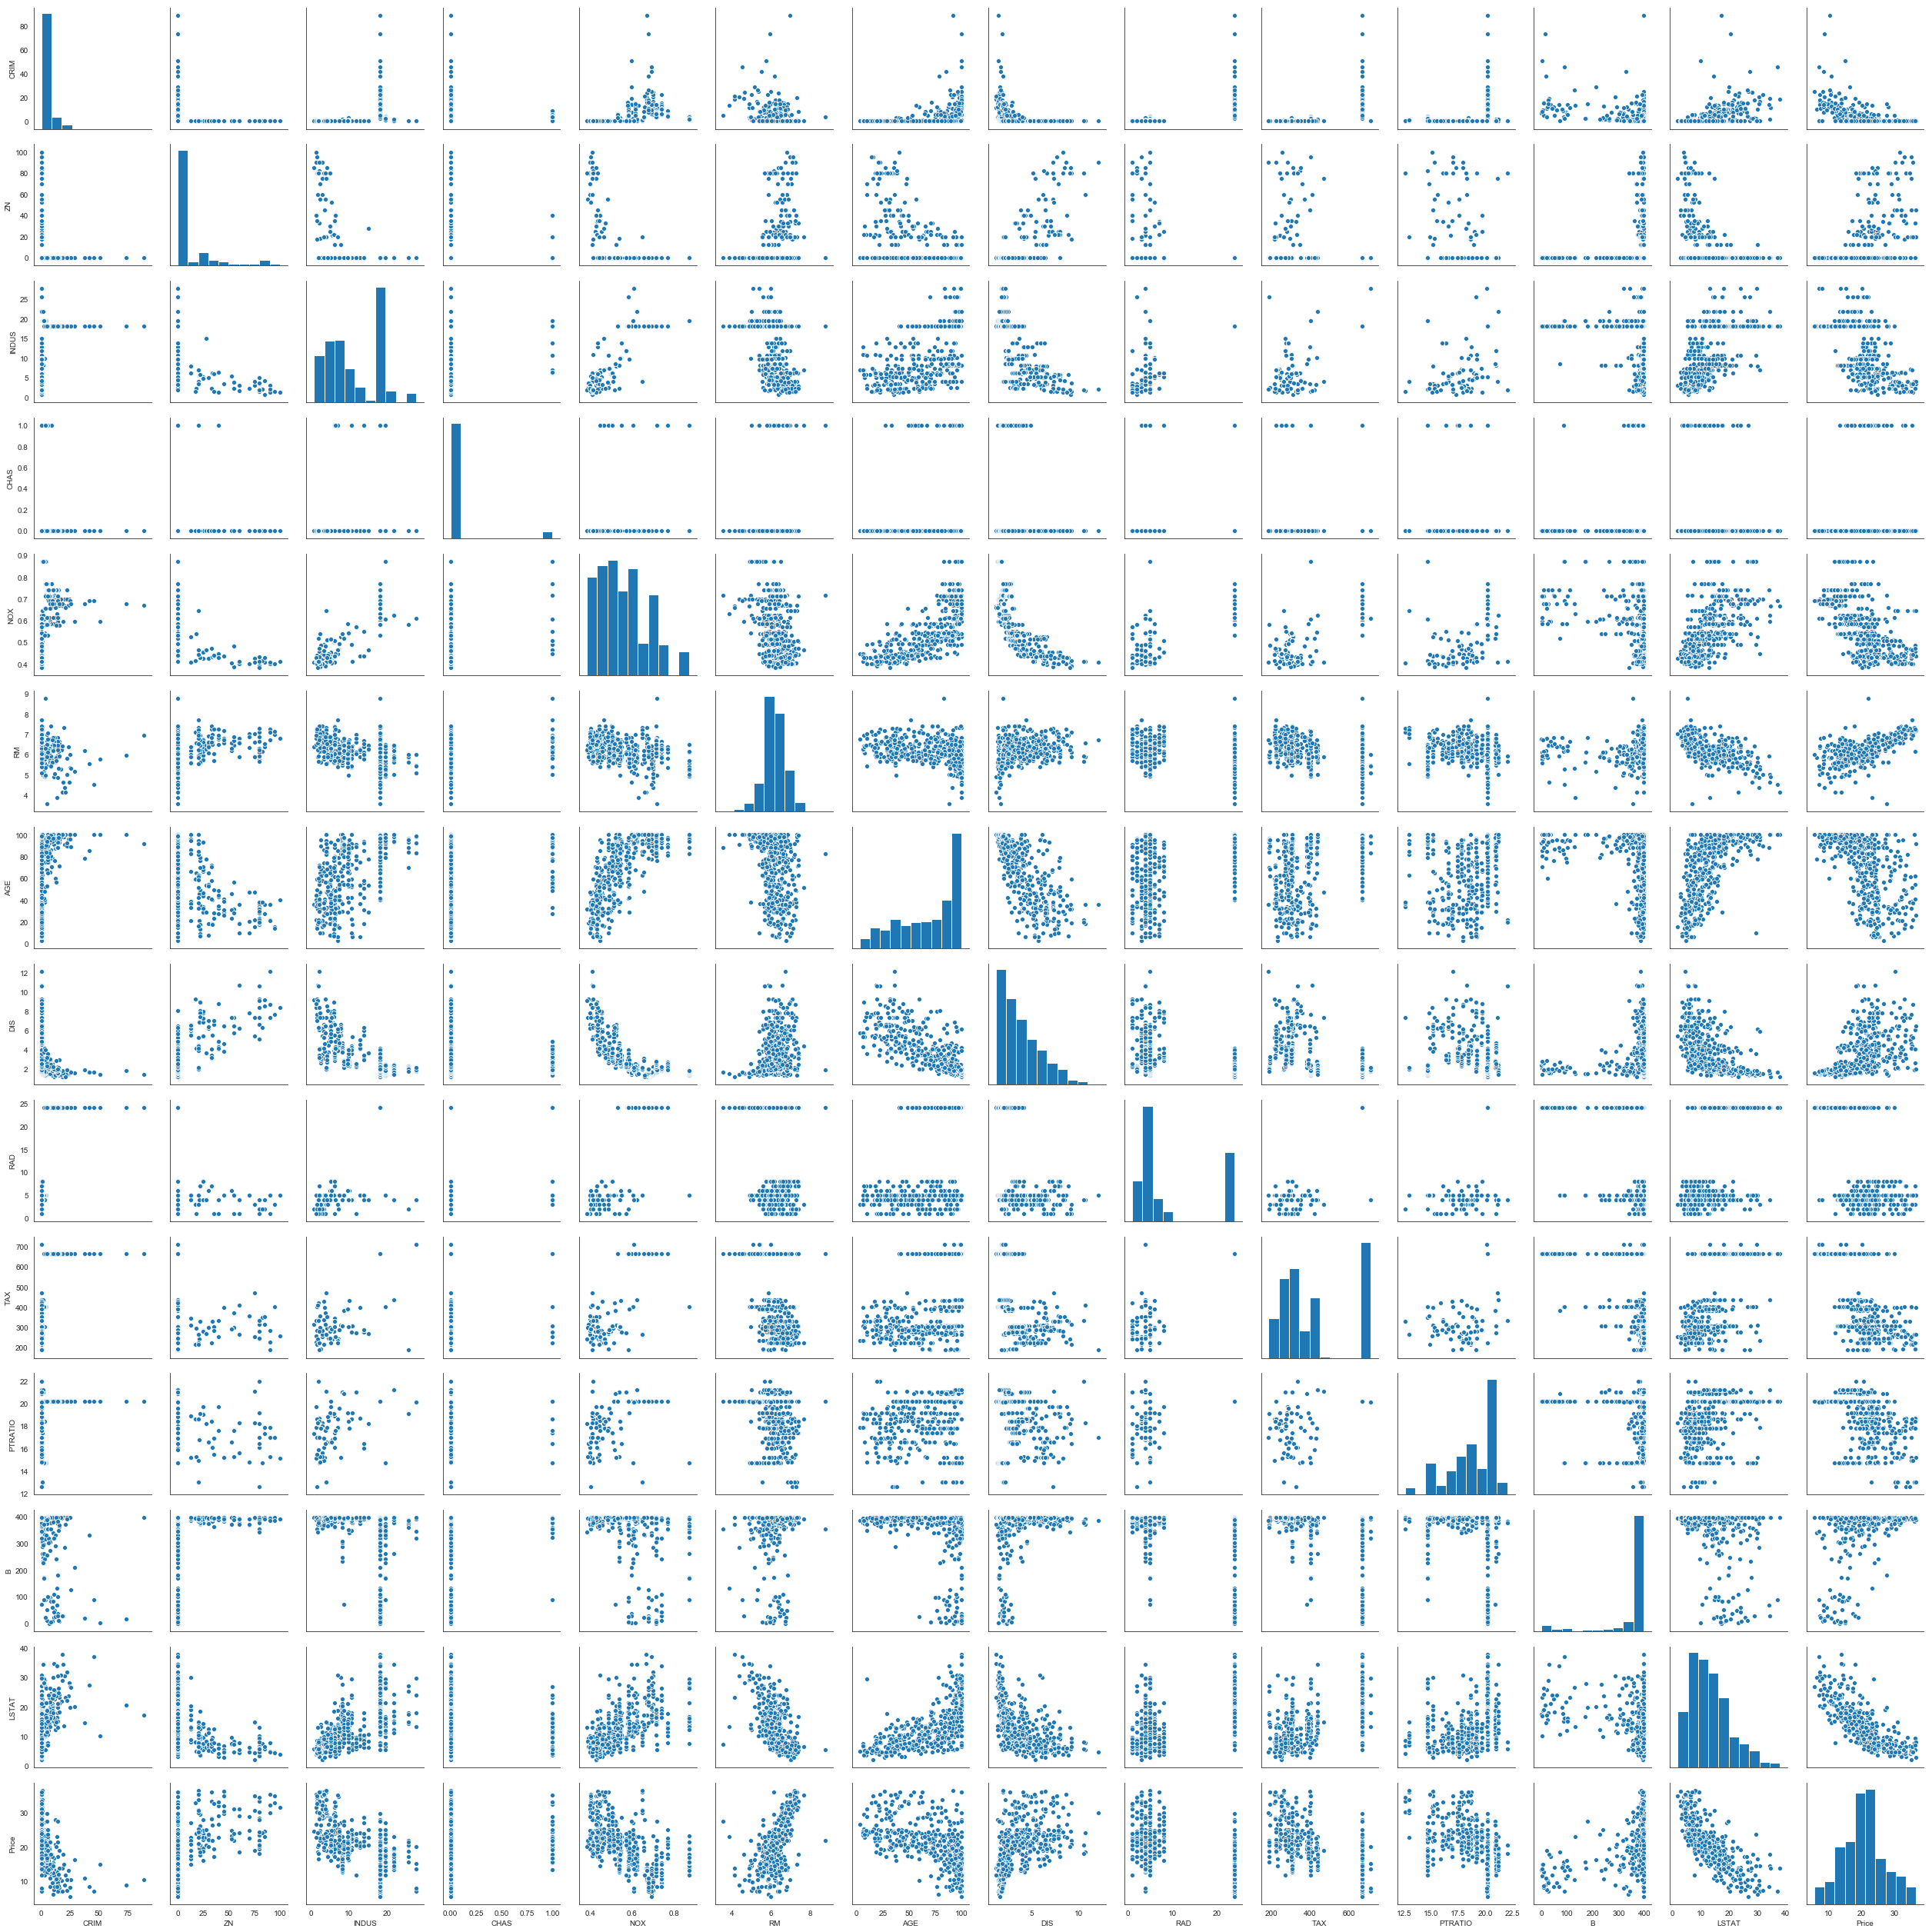

In [29]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(boston_df)

Since, there are so many scatter plots that it is difficult to make any sence. Therefore, lets try to find multicollinearity. 

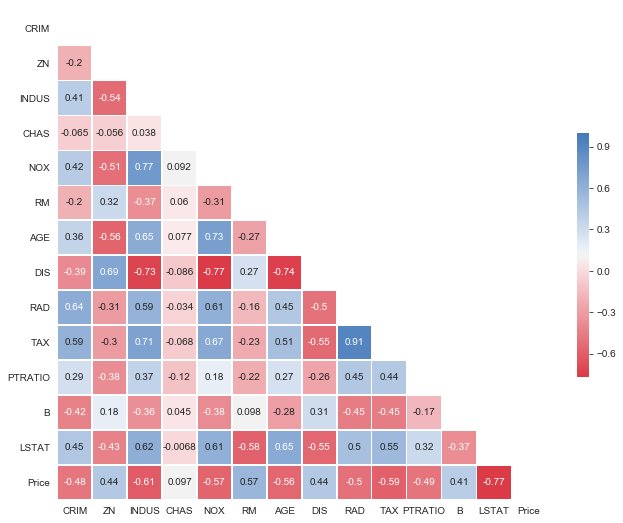

In [28]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr= boston_df.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)



* We can notice that DIS is highly negative correlated to INDUS, NOX, and AGE. I choose to exclude DIS from analysis.
* TAX is highly positive correlated to RAD. It is better to remove RAD because it is more importtant to analyse taxes rather that accessibility from highway.

In [30]:
boston_df1 = boston_df
boston_df1.head()
np.shape(boston_df1)
del boston_df['DIS']
del boston_df['RAD']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,222.0,18.7,396.90,5.33,36.2


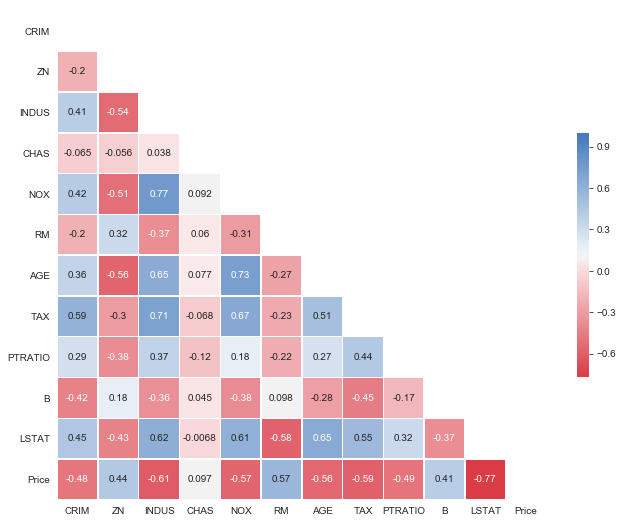

In [31]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr= boston_df.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)


#### Calculating Variance inflation factor VIF of features

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Price ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+TAX+PTRATIO+B+LSTAT', data= boston_df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif


,VIF,variable
0,483.589659,Intercept
1,1.682634,CRIM
2,1.864833,ZN
3,3.460718,INDUS
4,1.059536,CHAS
5,3.922598,NOX
6,1.670122,RM
7,2.866054,AGE
8,3.342799,TAX
9,1.580707,PTRATIO


Since VIF value is less than 10 therefore, we are good with these independent variables.

#### 4. Multivariant Linear Regression:
Linear regression is one of the simplest and most widly used regression techniques. One of its main advantages is the ease of interpreting results.

In linear regression, we first identify the target/dependent variable 𝑦 that is dependent/predictors on the set of independent variables **𝐱 = (𝑥₁, …, 𝑥ᵣ)**, where **𝑟** is the number of predictors.
The assumption of a linear relationship between 𝑦 and **𝐱** is **𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀**. This equation is called regression equation where **𝛽₀, 𝛽₁, …, 𝛽ᵣ** are the regression coefficients, and **𝜀** is the random error.

Linear regression calculates the predicted weights, denoted with **𝑏₀, 𝑏₁, …, 𝑏ᵣ**. They define the estimated regression function **𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ**. This function captures the dependencies between the inputs and output sufficiently well.

The estimated or predicted value, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. 
The differences **𝑦ᵢ - 𝑓(𝐱ᵢ)** for all observations 𝑖 = 1, …, 𝑛, are called the **residuals**. 
Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.


To get the best predicted weights that produce minimum residual,   the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛 should minimized. The formula for sum of squared residuals is **SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))²**. This approach is called the **Least Square Method**. 

To get a quick image to vizualize Leastsquare method where each sample object is represented by a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line such that the sum of the square of the distances between the line and each coordinate is minimum.


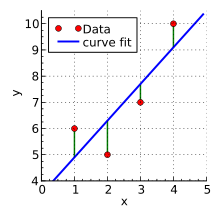

In [55]:
# Quick display of image form wikipedia

from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)


**Regression model evaluation metrics**

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
The above metrics can be expressed,

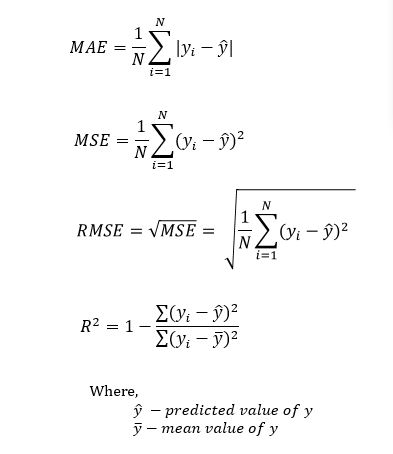

In [48]:
# Quick display of formulas

from IPython.display import Image
url = 'https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG'
Image(url)

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. fit() is used to learn the parameters of a model whereas predict().used to predict the value of a response variable for an explanatory variable using the learned parameters.

In [49]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Create a LinearRegression Object
lreg = LinearRegression()


In [36]:
# Data Columns
# creating data set except price, X_multi is the dataframe of all the exploratory or independent variables
X_multi = boston_df.drop('Price',1)
# Targets
Y_target = boston_df.Price

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). 

In [59]:
# Implement Linear Regression
reg = lreg.fit(X_multi,Y_target)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Calulating RMSE by using predict() function and R2 score by using score() function.

In [62]:

Y_predict = lreg.predict(X_multi)
rmse = (np.sqrt(mean_squared_error(Y_target, Y_predict)))
r2 = reg.score(X_multi,Y_target)

print("The model performance before splitting")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance before splitting
--------------------------------------
RMSE is 3.39416682118
R2 score is 0.722611037235




Checking the y intercept. 

In [38]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 25.81 


Checking the coefficients

In [39]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 11 


Creating the dataframe that shoust the beta coefficients with its independemt variables

In [40]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.048704
1,ZN,-0.000244
2,INDUS,-0.023727
3,CHAS,1.483603
4,NOX,-4.938849
5,RM,2.320072
6,AGE,-0.005948
7,TAX,-0.001890
8,PTRATIO,-0.678463
9,B,0.007007


The linear modelcequation is:
#### Price = 25.81 - 0.049 * CRIM - 0.0002 * ZN - 0.024 * INDUS + 1.484 * CHAS - 4.939 * NOX + 2.30 * RM - 0.006 * AGE - 0.002 * TAX - 0.678 * PTRATIO + 0.0007 * B - 0.375 * LSTAT

#### 8. Validation
##### Using Training and Validation

Spitting the sample into train the model with 80% of the samples and test with the remaining 20% by using train_test_split from sklearn.model_selection. 

In [43]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(372, 11)
(94, 11)
(372L,)
(94L,)


#### 9. Predicting Prices

Training set is used for the prediction and then testing set is used for validation.

In [64]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
# Predictions on training 
y_pred_train = lreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_pred_train)))
r2 = lreg.fit(X_train,Y_train).score(X_train,Y_train)

print("The model performance before training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - y_pred_train) ** 2))
    
print("\n")


#print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

# model evaluation for testing set
y_pred_test = lreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred_test)))
r2 = lreg.fit(X_test,Y_test).score(X_train,Y_train)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - y_pred_test) ** 2))


The model performance before training set
--------------------------------------
RMSE is 3.5711576161
R2 score is 0.729407010464
Fit a model X_train, and calculate MSE with Y_train: 12.75


The model performance for testing set
--------------------------------------
RMSE is 3.49102573317
R2 score is 0.697760496792
Fit a model X_train, and calculate MSE with X_test and Y_test: 12.19


In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

It looks like our mean square error between our training and testing was pretty close. 

### 10. Residual Plot

Text(0.5,1,'Residual Plots')

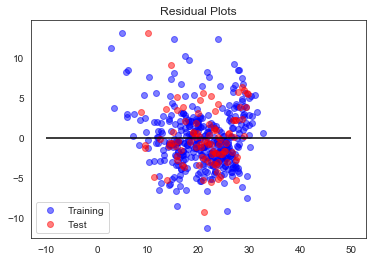

In [83]:
# Scatter plot the training data
train = plt.scatter(y_pred_train,(Y_train-y_pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(y_pred_test,(Y_test-y_pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

There aren't any major patterns to be concerned about, overall the majority of the residuals seem to be randomly allocated above and below the horizontal.

### Conclusion:

The linear regression Model is: 

Price = 25.81 - 0.049 * CRIM - 0.0002 * ZN - 0.024 * INDUS + 1.484 * CHAS - 4.939 * NOX + 2.30 * RM - 0.006 * AGE - 0.002 * TAX - 0.678 * PTRATIO + 0.0007 * B - 0.375 * LSTAT

* Median value of owner-occupied homes in 1000 dollars is most affected by nitric oxides concentration parts per 10 million. 
* If nitric oxides concentration parts per 10 million is decreased by 1 unit, then median value of owner-occupied homes increase by 4939 dollars while keeping all the variables as constant.
* Median value of owner-occupied homes in 1000 dollars is increase with the increase in the number of rooms. 
* Median value of owner-occupied homes increases by 2300 dollars for every increase of room count while keeping all the variables as constant.
* The median price of listings near river are more than the median price of the listings that are not in near river. We can also see that most of the listings are at the higher range of the pricings.

##### Reference:

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://realpython.com/linear-regression-in-python/
* https://medium.com/analytics-vidhya/a-beginners-guide-to-stepwise-multiple-linear-regression-e81df82b9f9e
* http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png
* https://riptutorial.com/seaborn/example/31922/basic-correlation-plot
* https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155